<a href="https://colab.research.google.com/github/aswinmkv/Python_Portfolio/blob/main/Ola_Ensemble%20-%20GB%2C%20Random_Forest%2C%20LGBM%2C%20XGBoost%2C%20Adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("ola_driver.csv")
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


## Exploratory Data Analysis

In [160]:
df.shape

(19104, 14)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


In [162]:
df=df.drop(columns="Unnamed: 0",axis=1)

In [163]:
df

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [164]:
df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])
df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"])

<ipython-input-164-c57a64b21c34>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["MMM-YY"]=pd.to_datetime(df["MMM-YY"])
<ipython-input-164-c57a64b21c34>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Dateofjoining"]=pd.to_datetime(df["Dateofjoining"])
<ipython-input-164-c57a64b21c34>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["LastWorkingDate"]=pd.to_datetime(df["LastWorkingDate"])


In [165]:
df.describe(include="all")

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104,19104.000000,19043.000000,19052.000000,19104,19104.000000,19104.000000,19104,1616,19104.000000,19104.000000,1.910400e+04,19104.000000
unique,NaN,NaN,NaN,NaN,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,C20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2019-12-11 02:09:29.849246464,1415.591133,34.668435,0.418749,NaN,1.021671,65652.025126,2018-04-28 20:52:54.874371840,2019-12-21 20:59:06.534653696,1.690536,2.252670,5.716621e+05,2.008899
min,2019-01-01 00:00:00,1.000000,21.000000,0.000000,NaN,0.000000,10747.000000,2013-04-01 00:00:00,2018-12-31 00:00:00,1.000000,1.000000,-6.000000e+06,1.000000
25%,2019-06-01 00:00:00,710.000000,30.000000,0.000000,NaN,0.000000,42383.000000,2016-11-29 12:00:00,2019-06-06 00:00:00,1.000000,1.000000,0.000000e+00,1.000000
50%,2019-12-01 00:00:00,1417.000000,34.000000,0.000000,NaN,1.000000,60087.000000,2018-09-12 00:00:00,2019-12-20 12:00:00,1.000000,2.000000,2.500000e+05,2.000000
75%,2020-07-01 00:00:00,2137.000000,39.000000,1.000000,NaN,2.000000,83969.000000,2019-11-05 00:00:00,2020-07-03 00:00:00,2.000000,3.000000,6.997000e+05,3.000000
max,2020-12-01 00:00:00,2788.000000,58.000000,1.000000,NaN,2.000000,188418.000000,2020-12-28 00:00:00,2020-12-28 00:00:00,5.000000,5.000000,3.374772e+07,4.000000


In [166]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [167]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1


In [168]:
df['Negative TBV'] = (df['Total Business Value'] < 0).astype(int)
df['Zero_TBV']=(df['Total Business Value'] == 0).astype(int)

In [169]:
df["Quarter"]=df["MMM-YY"].dt.to_period("Q")
QTR_TBV=df.groupby(["Driver_ID","Quarter"])["Total Business Value"].sum()
QTR_TBV=QTR_TBV.reset_index()
print(QTR_TBV)

      Driver_ID Quarter  Total Business Value
0             1  2019Q1               1715580
1             2  2020Q4                     0
2             4  2019Q4                     0
3             4  2020Q1                350000
4             4  2020Q2                     0
...         ...     ...                   ...
7352       2787  2019Q1                977830
7353       2787  2019Q2                     0
7354       2788  2020Q2                     0
7355       2788  2020Q3               1686340
7356       2788  2020Q4                611900

[7357 rows x 3 columns]


In [170]:
unique_drivers=df["Driver_ID"].unique()

df_driver=df.groupby("Driver_ID").agg({'MMM-YY': 'first','Age': 'max','Gender': 'first','City': 'first',
    'Education_Level': 'max','Income': np.mean,'Dateofjoining': 'first',
    'LastWorkingDate': lambda x: x.dropna().iloc[0] if not x.dropna().empty else None,
    'Joining Designation': 'max','Grade': 'max','Total Business Value': 'sum',
    'Quarterly Rating': np.mean,'Negative TBV': 'sum','Zero_TBV': 'sum'})
df_driver.head()

,MMM-YY,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Negative TBV,Zero_TBV
Driver_ID,,,,,,,,,,,,,,
1,2019-01-01,28.0,0.0,C23,2,57387.0,2018-12-24,2019-03-11,1,1,1715580,2.0,1,1
2,2020-11-01,31.0,0.0,C7,2,67016.0,2020-11-06,NaT,2,2,0,1.0,0,2
4,2019-12-01,43.0,0.0,C13,2,65603.0,2019-12-07,2020-04-27,2,2,350000,1.0,0,4
5,2019-01-01,29.0,0.0,C9,0,46368.0,2019-01-09,2019-03-07,1,1,120360,1.0,0,2
6,2020-08-01,31.0,1.0,C11,1,78728.0,2020-07-31,NaT,3,3,1265000,1.6,0,4


In [171]:
df_driver['Negative TBV'].value_counts()

Negative TBV
0    2245
1     125
2       9
3       2
Name: count, dtype: int64

In [172]:
df_driver['Zero_TBV'].value_counts()

Zero_TBV
2     533
1     520
3     474
4     350
5     210
0     148
6      70
7      39
8      15
9       8
10      6
11      5
12      1
15      1
14      1
Name: count, dtype: int64

In [173]:
df_driver.isna().sum()

MMM-YY                    0
Age                       0
Gender                    0
City                      0
Education_Level           0
Income                    0
Dateofjoining             0
LastWorkingDate         765
Joining Designation       0
Grade                     0
Total Business Value      0
Quarterly Rating          0
Negative TBV              0
Zero_TBV                  0
dtype: int64

In [174]:
df_driver.duplicated().sum()

0

In [175]:
df_driver.shape

(2381, 14)

In [176]:
# Calculate the count of drivers with increased Quarterly Rating
def qrt_rat_inc(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] > rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_inc).reset_index(name='Quarterly_Rating_increased')

df_driver = pd.merge(left=df_driver,
                right=Quarterly_Rating_increased,
                on="Driver_ID",
                how="outer")

df_driver['Quarterly_Rating_increased'].value_counts()

Quarterly_Rating_increased
0    2365
1      16
Name: count, dtype: int64

In [177]:
# Calculate the count of drivers with decreased Quarterly Rating
def qrt_rat_dec(rating):
    if len(rating) >= 2:
        return int(rating.iloc[-1] < rating.iloc[-2])
    else:
        return 0

Quarterly_Rating_decreased = df.groupby("Driver_ID")["Quarterly Rating"].apply(qrt_rat_dec).reset_index(name='Quarterly_Rating_decreased')

df_driver = pd.merge(left=df_driver,
                right=Quarterly_Rating_decreased,
                on="Driver_ID",
                how="outer")

df_driver['Quarterly_Rating_decreased'].value_counts()

Quarterly_Rating_decreased
0    2251
1     130
Name: count, dtype: int64

In [178]:
# Calculate the count of drivers with increased Income
def inc_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] > inc.iloc[-2])
    else:
        return 0

Increased_income = df.groupby("Driver_ID")["Income"].apply(inc_income).reset_index(name='Increased_income')

df_driver = pd.merge(left=df_driver,
                right=Increased_income,
                on="Driver_ID",
                how="outer")

df_driver['Increased_income'].value_counts()

Increased_income
0    2370
1      11
Name: count, dtype: int64

In [179]:
# Calculate the count of drivers with decreased Income
def dec_income(inc):
    if len(inc) >= 2:
        return int(inc.iloc[-1] < inc.iloc[-2])
    else:
        return 0

Decreased_income = df.groupby("Driver_ID")["Income"].apply(dec_income).reset_index(name='Decreased_income')

df_driver  = pd.merge(left=df_driver ,
                right=Decreased_income,
                on="Driver_ID",
                how="outer")

df_driver ['Decreased_income'].value_counts()

Decreased_income
0    2380
1       1
Name: count, dtype: int64

In [180]:
# Calculate the count of drivers with increase in Grade
def inc_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]>grd.iloc[-2])
  else:
    return 0

Increased_grade = df.groupby("Driver_ID")["Grade"].apply(inc_grade).reset_index(name='Increased_grade')

df_driver = pd.merge(left=df_driver,
                right=Increased_grade,
                on="Driver_ID",
                how="outer")

df_driver['Increased_grade'].value_counts()

Increased_grade
0    2370
1      11
Name: count, dtype: int64

In [181]:
# Calculate the count of drivers with decrease in Grade
def dec_grade(grd):
  if len(grd)>=2:
    return int(grd.iloc[-1]<grd.iloc[-2])
  else:
    return 0

Decreased_grade = df.groupby("Driver_ID")["Grade"].apply(dec_grade).reset_index(name='Decreased_grade')

df_driver = pd.merge(left=df_driver,
                right=Decreased_grade,
                on="Driver_ID",
                how="outer")

df_driver['Decreased_grade'].value_counts()

Decreased_grade
0    2380
1       1
Name: count, dtype: int64

In [182]:
# Drop irrelevant columns
df_driver=df_driver.drop(['Decreased_income', 'Decreased_grade'], axis=1)

In [183]:
# Extract year from Date of Joining
df_driver['JoiningYear']=df_driver['Dateofjoining'].dt.year

In [184]:
# Calculate Total Business Value to Income ratio
df_driver['Inc_ratio']=df_driver['Total Business Value']//df_driver['Income']

In [185]:
# Create the target variable to classify the Drivers' attrition
df_driver['target'] = df_driver['LastWorkingDate'].notnull().astype(int)

In [186]:
df_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2381 entries, 0 to 2380
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Driver_ID                   2381 non-null   int64         
 1   MMM-YY                      2381 non-null   datetime64[ns]
 2   Age                         2381 non-null   float64       
 3   Gender                      2381 non-null   float64       
 4   City                        2381 non-null   object        
 5   Education_Level             2381 non-null   int64         
 6   Income                      2381 non-null   float64       
 7   Dateofjoining               2381 non-null   datetime64[ns]
 8   LastWorkingDate             1616 non-null   datetime64[ns]
 9   Joining Designation         2381 non-null   int64         
 10  Grade                       2381 non-null   int64         
 11  Total Business Value        2381 non-null   int64       

In [187]:
df_driver['target'].value_counts()

target
1    1616
0     765
Name: count, dtype: int64

In [188]:
print(round((df_driver.groupby('Education_Level')['target'].mean())*100,2))
print(round((df_driver.groupby('Grade')['target'].mean())*100,2))
print(df_driver['Grade'].value_counts())
print(round((df_driver.groupby('target')['Total Business Value'].mean()),2))

Education_Level
0    69.13
1    66.29
2    68.20
Name: target, dtype: float64
Grade
1    80.43
2    70.26
3    54.01
4    50.72
5    54.17
Name: target, dtype: float64
Grade
2    854
1    741
3    624
4    138
5     24
Name: count, dtype: int64
target
0    9620626.31
1    2203745.76
Name: Total Business Value, dtype: float64


<Axes: xlabel='City', ylabel='count'>

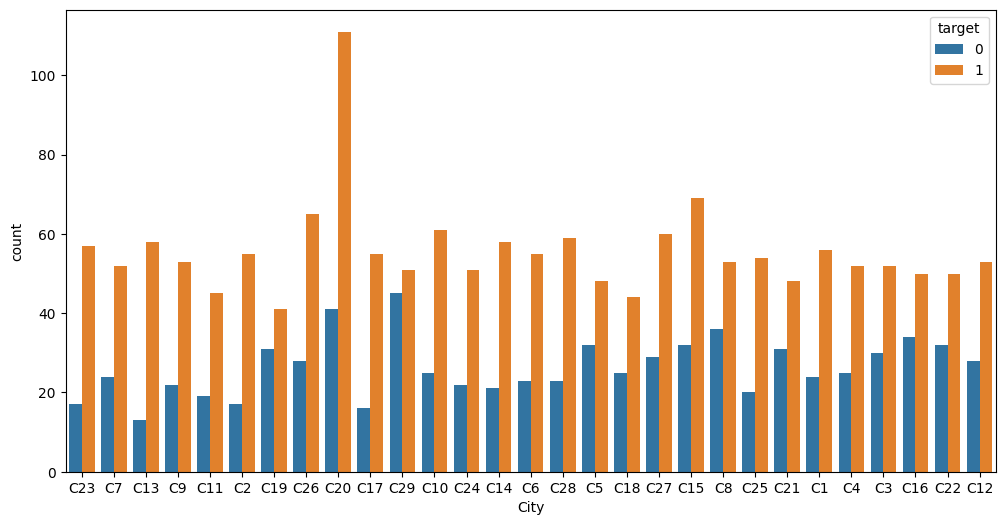

In [189]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_driver, x='City', hue='target')

<Axes: xlabel='Grade', ylabel='Income'>

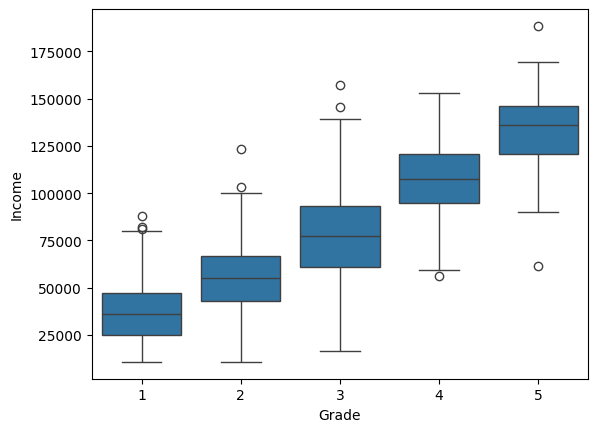

In [190]:
sns.boxplot(data=df_driver, x='Grade', y='Income')

<Axes: xlabel='Quarterly_Rating_decreased', ylabel='Total Business Value'>

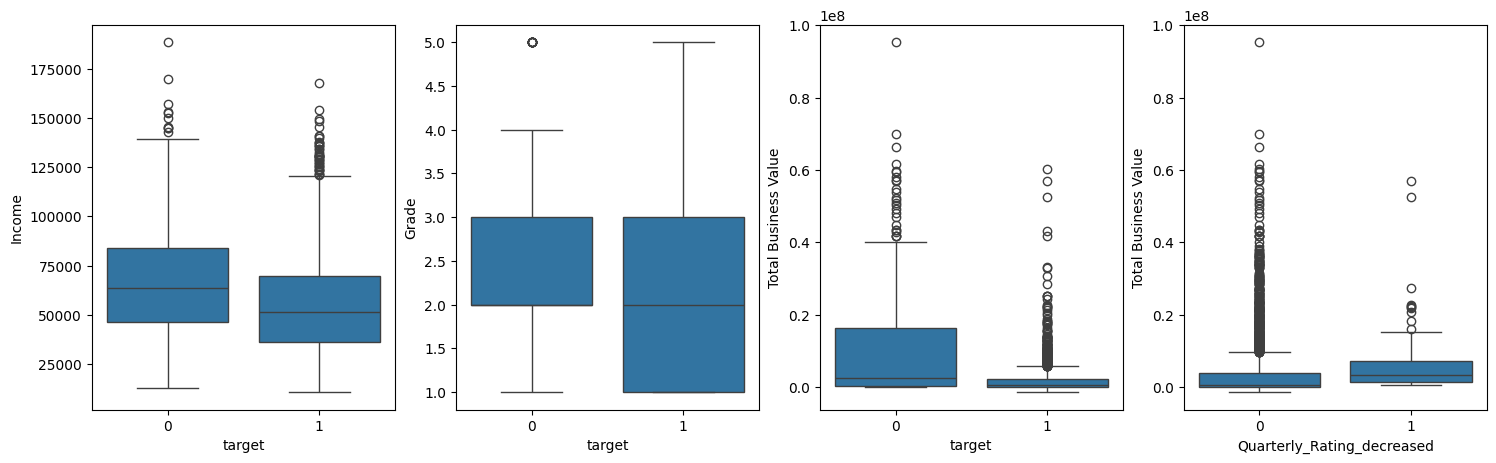

In [191]:
plt.figure(figsize=(18,5))

plt.subplot(1, 4, 1)
sns.boxplot(data=df_driver, x='target', y='Income')
plt.subplot(1, 4, 2)
sns.boxplot(data=df_driver, x='target', y='Grade')
plt.subplot(1, 4, 3)
sns.boxplot(data=df_driver, x='target', y='Total Business Value')
plt.subplot(1, 4, 4)
sns.boxplot(data=df_driver, x='Quarterly_Rating_decreased', y='Total Business Value')

<Axes: xlabel='City', ylabel='QR_round'>

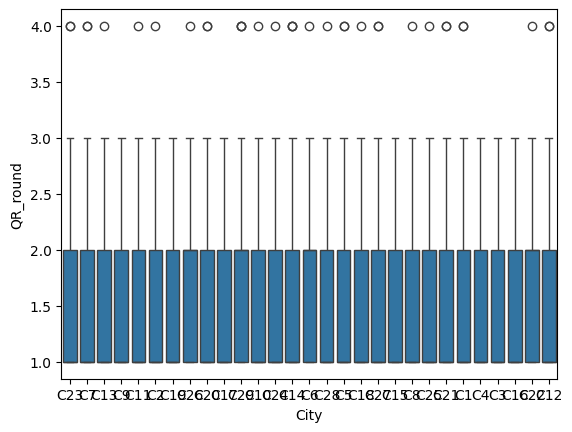

In [192]:
df_driver['QR_round'] = round(df_driver['Quarterly Rating'],0)
sns.boxplot(data=df_driver, x='City', y='QR_round')

<Axes: xlabel='Total Business Value', ylabel='Grade'>

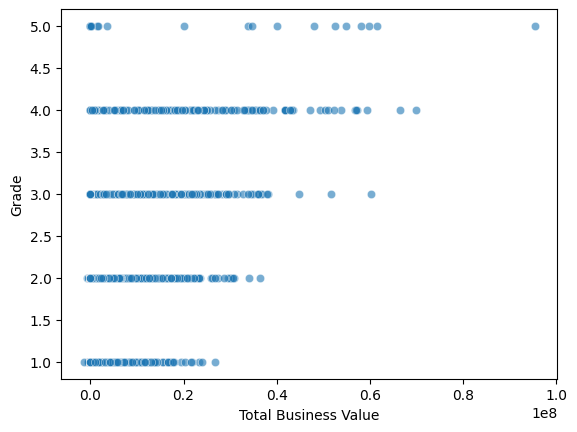

In [193]:
sns.scatterplot(data=df_driver, x='Total Business Value', y='Grade', alpha=0.6)

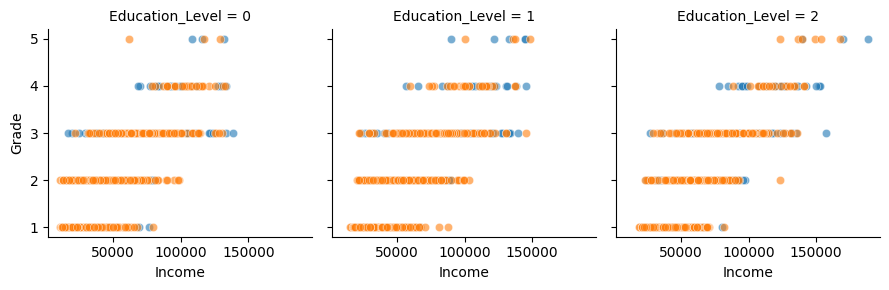

In [194]:
sns.FacetGrid(df_driver, col='Education_Level', hue='target').map(sns.scatterplot, 'Income', 'Grade', alpha=0.6)

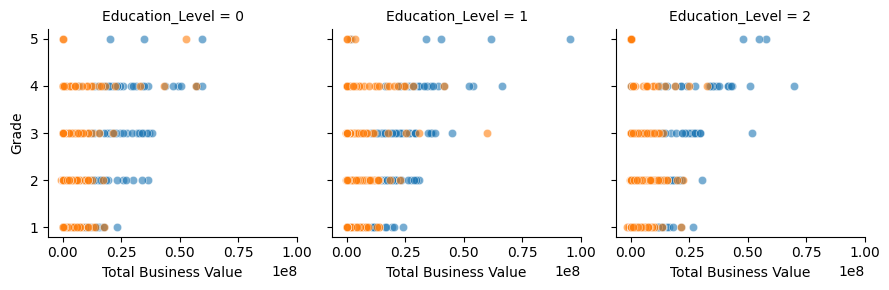

In [195]:
sns.FacetGrid(df_driver, col='Education_Level', hue='target').map(sns.scatterplot, 'Total Business Value', 'Grade', alpha=0.6)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


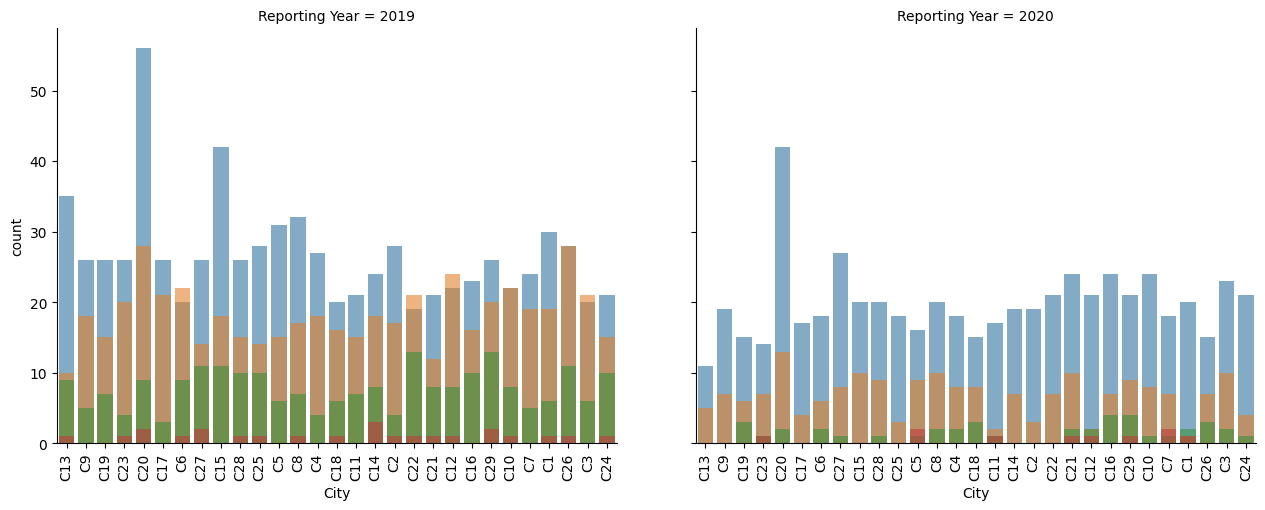

In [196]:
df_driver['Reporting Year']=df_driver['MMM-YY'].dt.year
df_driver['QR_round'] = round(df_driver['Quarterly Rating'],0)
a=sns.FacetGrid(df_driver, col='Reporting Year', hue='QR_round').map(sns.countplot, 'City', alpha=0.6)
a.fig.set_size_inches(14,6)
a.set_xticklabels(rotation=90)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


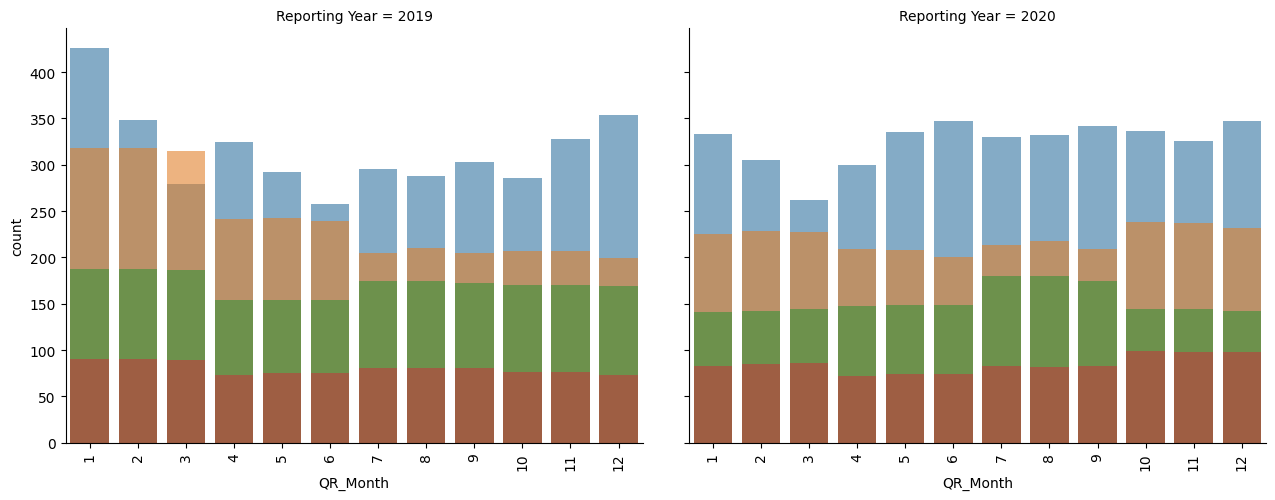

In [197]:
df['Reporting Year']=df['MMM-YY'].dt.year
df['QR_Month'] = df['MMM-YY'].dt.month
df['QR_round'] = round(df['Quarterly Rating'],0)
b=sns.FacetGrid(df, col='Reporting Year', hue='QR_round').map(sns.countplot, 'QR_Month', alpha=0.6)
b.fig.set_size_inches(14,6)
b.set_xticklabels(rotation=90)

<Axes: >

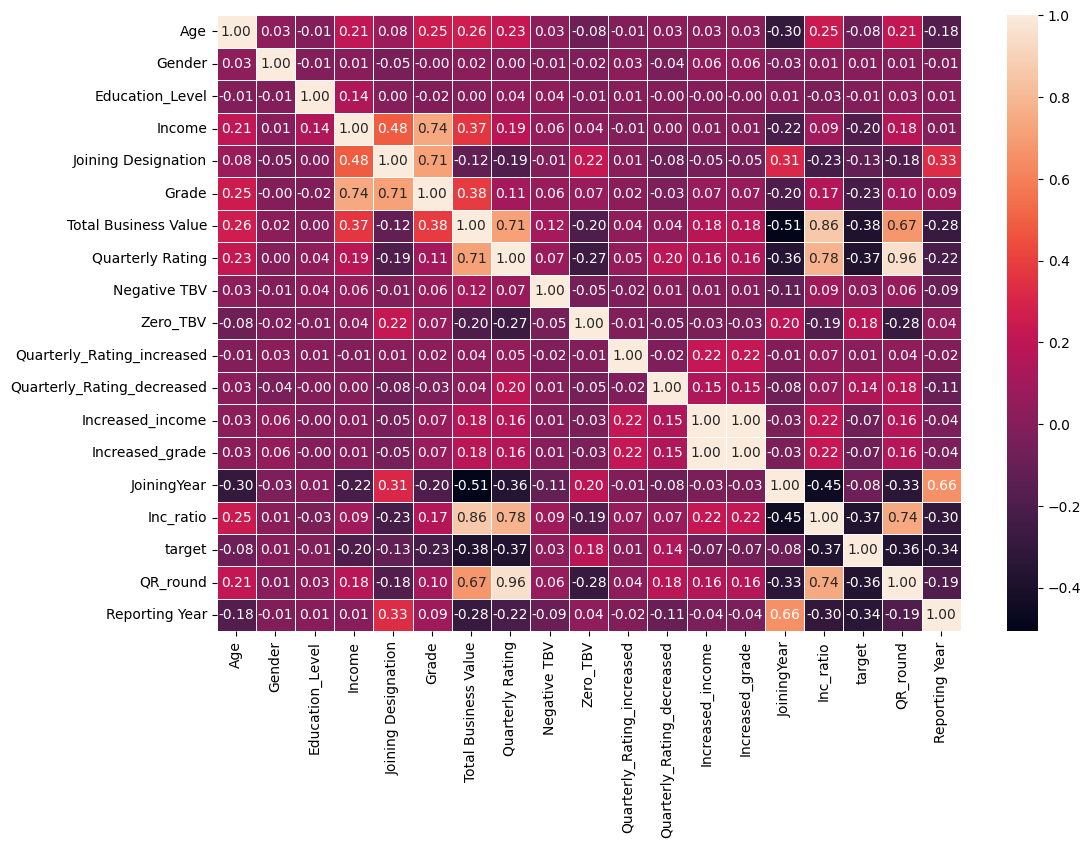

In [198]:
df_dr=df_driver.drop(['City', 'Driver_ID', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate'],axis=1)
correlation_matrix = df_dr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,fmt=".2f",linewidths=0.5)

## Data Pre-Processing and modelling

In [199]:
# City Encoding
city_mapping = {
    'C1': 1, 'C2': 2, 'C3': 3, 'C4': 4, 'C5': 5, 'C6': 6, 'C7': 7, 'C8': 8, 'C9': 9, 'C10': 10,
    'C11': 11, 'C12': 12, 'C13': 13, 'C14': 14, 'C15': 15, 'C16': 16, 'C17': 17, 'C18': 18, 'C19': 19, 'C20': 20,
    'C21': 21, 'C22': 22, 'C23': 23, 'C24': 24, 'C25': 25, 'C26': 26, 'C27': 27, 'C28': 28, 'C29': 29
}

# Map the cities using the dictionary
df_driver['City'] = df_driver['City'].map(city_mapping)

In [200]:
df_driver['Ranking'] =df_driver['Grade']+(df_driver['Joining Designation'])

In [201]:
# Input and Target feature separation
X=df_driver.drop(['target', 'MMM-YY', 'Dateofjoining', 'LastWorkingDate', 'Education_Level', 'Grade', 'Joining Designation', 'Reporting Year', 'QR_round', 'Driver_ID'], axis=1)
y=df_driver['target']

In [202]:
from sklearn.preprocessing import StandardScaler
cols = X.columns

scale = StandardScaler()
X_scaled = scale.fit_transform(X)

X_scaled = pd.DataFrame(data=X_scaled, columns=cols)

In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
y_train.value_counts()

target
1    1289
0     615
Name: count, dtype: int64

In [207]:
# Random forest Model
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=150, min_samples_leaf=3, criterion='entropy', n_jobs=-1, random_state=42)

rf_classifier.fit(X_train,y_train)

pred_train = rf_classifier.predict(X_train)
pred_test = rf_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test, y_test)}')


Train Accuracy: 0.9495798319327731
Validation Accuracy: 0.8574423480083857


In [208]:
for score, name in zip(rf_classifier.feature_importances_, X_train.columns):
  print(round(score,2),name)

0.05 Age
0.01 Gender
0.06 City
0.08 Income
0.16 Total Business Value
0.1 Quarterly Rating
0.0 Negative TBV
0.09 Zero_TBV
0.0 Quarterly_Rating_increased
0.02 Quarterly_Rating_decreased
0.0 Increased_income
0.0 Increased_grade
0.25 JoiningYear
0.13 Inc_ratio
0.04 Ranking


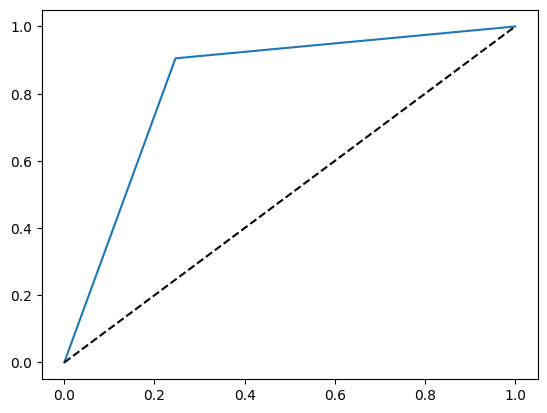

In [211]:
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix
roc_auc = roc_auc_score(y_test, pred_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_test)
cm = confusion_matrix(y_test, pred_test)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')



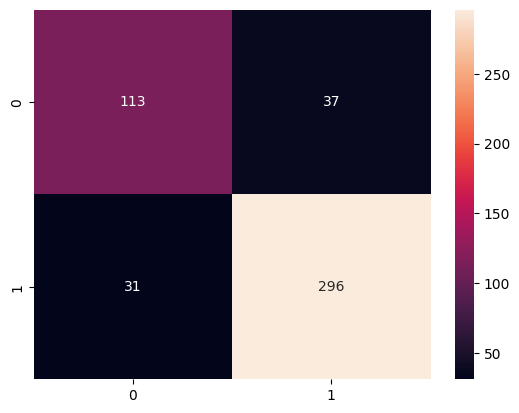

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       150
           1       0.89      0.91      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.83      0.83       477
weighted avg       0.86      0.86      0.86       477



In [212]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, pred_test))

In [215]:
#Light Gradient Boosting machine
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(n_estimators=150, boosting_type='gbdt', learning_rate=0.02, random_state=42)

lgb_classifier.fit(X_train, y_train)

pred_train1 = lgb_classifier.predict(X_train)
pred_test1 = lgb_classifier.predict(X_test)

print(f'Train Accuracy: {accuracy_score(pred_train1, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test1, y_test)}')

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1289, number of negative: 615
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000256 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 1904, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.676996 -> initscore=0.740000
[LightGBM] [Info] Start training from score 0.740000
Train Accuracy: 0.9343487394957983
Validation Accuracy: 0.8658280922431866


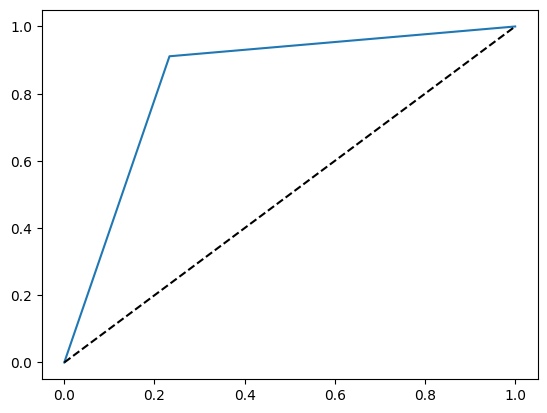

In [216]:
roc_auc = roc_auc_score(y_test, pred_test1)
fpr, tpr, thresholds = roc_curve(y_test, pred_test1)
cm = confusion_matrix(y_test, pred_test1)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

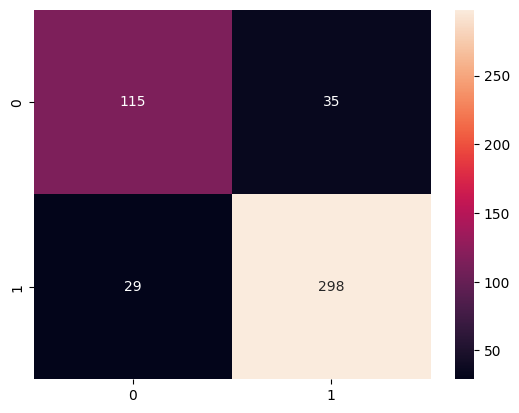

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.89      0.91      0.90       327

    accuracy                           0.87       477
   macro avg       0.85      0.84      0.84       477
weighted avg       0.86      0.87      0.87       477



In [217]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, pred_test1))

In [218]:
#XGBoost
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(n_estimators=50, learning_rate=0.095, random_state=42)

xgb_classifier.fit(X_train, y_train)

pred_train2 = xgb_classifier.predict(X_train)
pred_test2 = xgb_classifier.predict(X_test)

# Evaluate the model
print(f'Train Accuracy: {accuracy_score(pred_train2, y_train)}')
print(f'Validation Accuracy: {accuracy_score(pred_test2, y_test)}')

Train Accuracy: 0.9332983193277311
Validation Accuracy: 0.8616352201257862


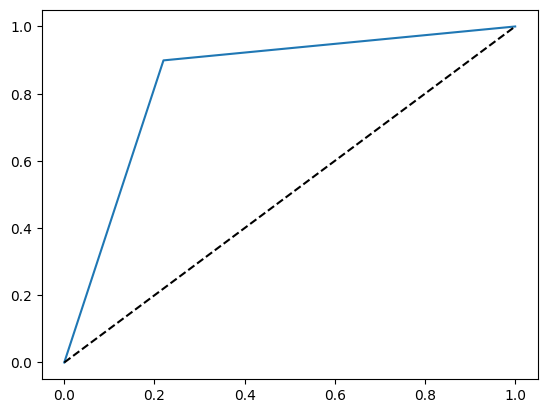

In [219]:
roc_auc = roc_auc_score(y_test, pred_test2)
fpr, tpr, thresholds = roc_curve(y_test, pred_test2)
cm2 = confusion_matrix(y_test, pred_test2)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

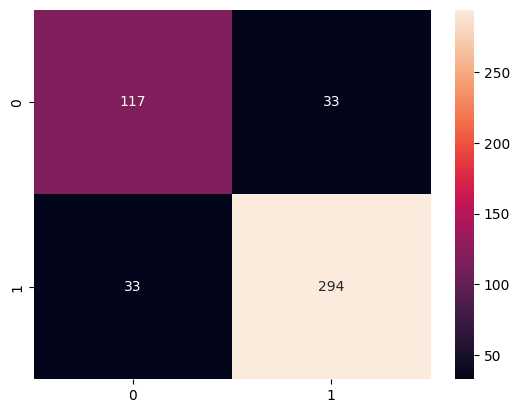

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       150
           1       0.90      0.90      0.90       327

    accuracy                           0.86       477
   macro avg       0.84      0.84      0.84       477
weighted avg       0.86      0.86      0.86       477



In [220]:
sns.heatmap(cm2, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, pred_test2))

In [225]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.131, random_state=42)

gb.fit(X_train, y_train)

pred_test4 = gb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test4)
print("Accuracy:", accuracy)

Accuracy: 0.8721174004192872


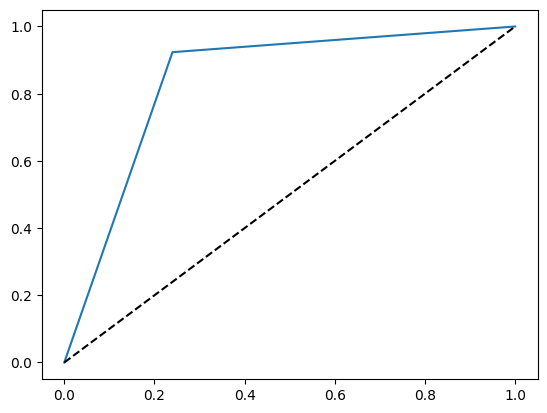

In [226]:
roc_auc = roc_auc_score(y_test, pred_test4)
fpr, tpr, thresholds = roc_curve(y_test, pred_test4)
cm3 = confusion_matrix(y_test, pred_test4)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

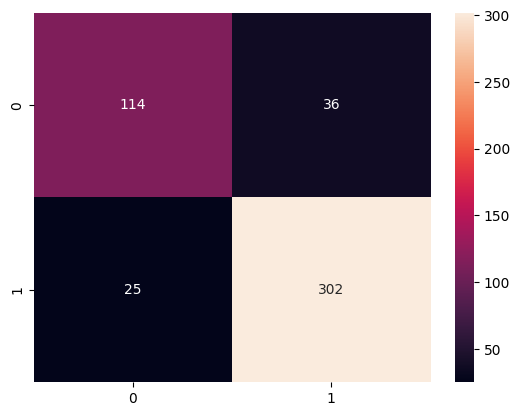

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       150
           1       0.89      0.92      0.91       327

    accuracy                           0.87       477
   macro avg       0.86      0.84      0.85       477
weighted avg       0.87      0.87      0.87       477



In [227]:
sns.heatmap(cm3, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, pred_test4))

In [229]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier(n_estimators=80, learning_rate=0.84, random_state=42)

adb.fit(X_train, y_train)

pred_test5 = adb.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, pred_test5)
print("Accuracy:", accuracy)

Accuracy: 0.8805031446540881


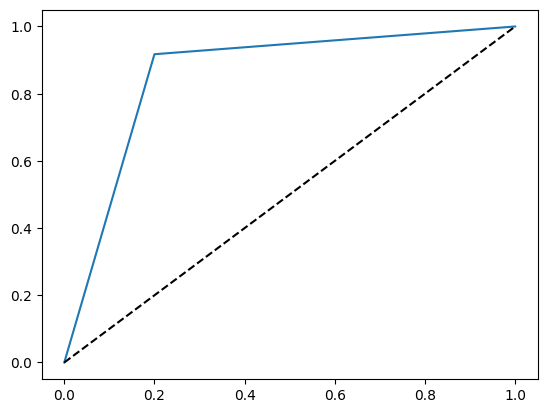

In [230]:
roc_auc = roc_auc_score(y_test, pred_test5)
fpr, tpr, thresholds = roc_curve(y_test, pred_test5)
cm4 = confusion_matrix(y_test, pred_test5)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')

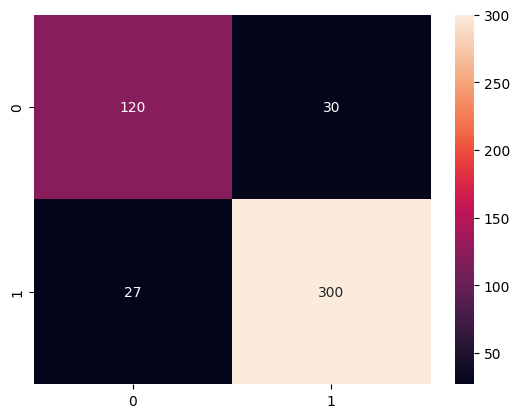

              precision    recall  f1-score   support

           0       0.82      0.80      0.81       150
           1       0.91      0.92      0.91       327

    accuracy                           0.88       477
   macro avg       0.86      0.86      0.86       477
weighted avg       0.88      0.88      0.88       477



In [231]:
sns.heatmap(cm4, annot=True, fmt='d')
plt.show()

print(classification_report(y_test, pred_test5))

## Summary

Accuracy Scores:

Random Forest Classifier :85.74%

Gradient Boost :87.21%

Light Gradient Boosting  :86.58%

XGBoost :86.16%

Adaboost :88.05%



Performance Metrics Summary:

Precision: Ranges from 78% to 91%, indicating the models' ability to accurately predict churn while minimizing false positives.

Recall: Ranges from 73% to 92%, reflecting the models' capacity to identify actual churn cases among all instances.

F1 Score: Ranges from 77% to 91%, providing a balanced measure of precision and recall.

ROC AUC: Ranges from 82% to 86%, showcasing the models' effectiveness in distinguishing between churn and non-churn instances

Feature importance : joining year and total business value are the two most important features interms of predicting the churn rate

## Questionnaire

1.What percentage of drivers have received a quarterly rating of 5?

Ans: None

2.Comment on the correlation between Age and Quarterly Rating

Ans: Weak Positive Correlation of 0.23, there is a weak positive linear relationship between Age and Quarterly Rating

3.Name the city which showed the most improvement in Quarterly Rating over the past year

ans:C3 and C21

4.Drivers with a Grade of ‘A’ are more likely to have a higher Total Business Value. (T/F)

ans:False,While a higher total business value may be associated with drivers having a higher grade, it does not necessarily imply that drivers with a higher grade always contribute to a higher total business value

5.If a driver's Quarterly Rating drops significantly, how does it impact their Total Business Value in the subsequent period?

ans:its directly proportional effect on each other

6.From Ola's perspective, which metric should be the primary focus for driver retention?ROC AUC,Precision,Recall,F1 Score

ans:In situations where the repercussions of false negatives (predicting a driver will not churn, but they actually do) are more severe than those of false positives (predicting a driver will churn, but they do not), prioritizing Recall becomes crucial.

By maximizing Recall, the focus is on capturing all potentially churn-prone drivers, even if it leads to some false positives. This strategy aims to mitigate the risk of overlooking drivers who are genuinely at risk of leaving the platform

7.How does the gap in precision and recall affect Ola's relationship with its drivers and customers?

Ans: Driver Relationship:

High Precision, Low Recall: Ola focuses on accurately identifying top-performing drivers, leading to driver satisfaction but potentially overlooking some deserving drivers.

Low Precision, High Recall: Ola casts a wider net to include more drivers, ensuring deserving ones aren't missed, but risking rewarding drivers who don't truly deserve it.

Customer Relationship:

High Precision, Low Recall: Ola accurately matches customers with top-quality drivers, ensuring high customer satisfaction but potentially missing some good drivers.

Low Precision, High Recall: Ola recommends more drivers, increasing service availability but also risking recommending drivers who don't meet service standards, potentially leading to customer dissatisfaction

8.Besides the obvious features like "Number of Rides", which lesser-discussed features might have a strong impact on a driver's Quarterly Rating?

Ans: Response Time
Route Efficiency
Vehicle Cleanliness and Maintenance
Communication Skills
Safety and Driving Behavior
Personalization and Customer Service

9.Will the driver's performance be affected by the City they operate in? (Yes/No)

Ans: No. The driver's performance is not affected by the City they operate in as it can be inferred from the box plot that all the cities share a similar range of Quarterly Rating among it's drivers.

10.Analyze any seasonality in the driver's ratings. Do certain times of the year correspond to higher or lower ratings, and why might that be?

Ans: Not much seasonality is seen in the driver's ratings however in the months of 'July,' 'August' and 'September' for both the years 2019 and 2020 there is a decline than usual in the 2.0 Quarterly Rating of the driver's
